In [13]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os,sys
from sklearn.decomposition import FastICA
from time import time

imdir = 'trap_array_data'
sys.path.append(os.path.join('.',imdir))

In [258]:
def from_csv(fname):
    """convert raveled csv data back into an array of 512 x 512 arrays"""
    with open(fname) as f:
        reader = csv.reader(f, delimiter=',')
        my_data = np.array([row for row in reader])
    data = np.array([np.reshape(x, (512,512)) for x in my_data])
    return data

def from_npy(fname):
    data = np.squeeze(np.load(fname))
    return data

def ica_project(images, components=None, whiten=True):
    """Independent component analysis. returns the data projected on the ICA"""
    X = images.reshape(
        images.shape[0],
        images.shape[1] * images.shape[2]
    ).astype(float)
    
    if components == None:
        components=len(images)
    
    ica = FastICA(n_components=components, max_iter=2000, whiten=whiten)
    ica.fit(X)
    A_ica = ica.components_  # Get estimated mixing matrix
    image_sum = np.sum(np.abs(A_ica),axis=0).reshape(images.shape[1], images.shape[2])
    return image_sum

In [17]:
t0 = time()
bg = from_file2(imdir+'/'+'background_20211209.csv')
print("csv.reader: ", time()-t0)

csv.reader:  44.83545970916748


In [48]:
t0 = time()
bg = from_npy(imdir+'/'+'background_20211209.npy')
time() - t0
print("np.load from npy: ", time()-t0)

np.load from npy:  0.051644325256347656


In [49]:
t0 = time()
img = from_npy(imdir+'/'+'images_20211209.npy')
time() - t0
print("np.load from npy: ", time()-t0)

np.load from npy:  0.42250537872314453


0.22371753334387012 0.1344180060679126


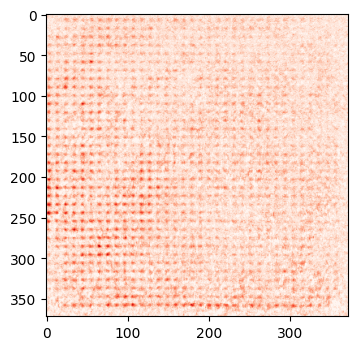

In [201]:
plt.figure(dpi=100)
norm = img[5:].mean(0)/bg[5:].mean(0)
# norm /= np.amax(norm)
print(np.amax(norm),np.amin(norm))
plt.imshow(norm,cmap='Reds',vmin=0.16)#,vmax=0.24)
xmin = 104+5
xmax = 476+5
ymin = 29+5
ymax = 401+5
crop_img = img[4:,ymin:ymax,xmin:xmax]
crop_bg = bg[4:,ymin:ymax,xmin:xmax]
plt.imshow(crop_img.mean(0)/crop_bg.mean(0),cmap='Reds',vmin=0.16)
plt.show()

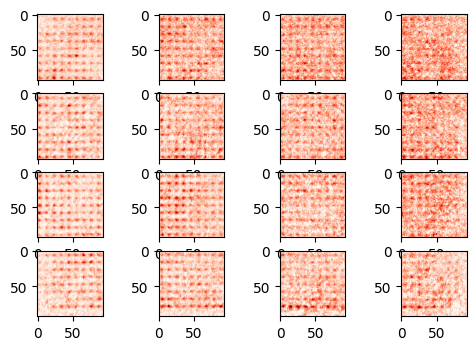

In [202]:
fig,axes = plt.subplots(nrows=4,ncols=4,dpi=100)
for i in range(4):
    for j in range(4):
        axes[i,j].imshow((crop_img.mean(0)/crop_bg.mean(0))[i*93:(i+1)*93,j*93:(j+1)*93],cmap='Reds',vmin=0.16)

In [203]:
sites = [[]] # by-eye estimate of sites in each of the 16 images

1296

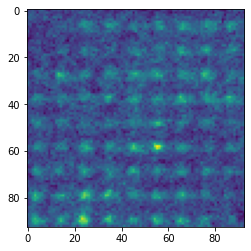

In [253]:
# fast ica on just one sub-image
i=j=0
plt.imshow((crop_img.mean(0)/crop_bg.mean(0))[i*93:(i+1)*93,j*93:(j+1)*93])#,cmap='Reds',vmin=0.16)

In [227]:
np.amax(crop_img[:78]),np.amin(crop_img[:78]),

(26412, 3477)

In [237]:
(crop_img[:sites]/np.amax(crop_img[:sites])).shape

(78, 372, 372)

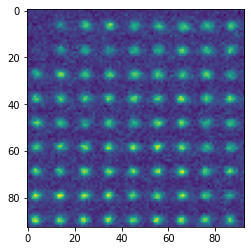

In [264]:
dx = dy = 93
frames = 200
sites = 81
sub_img = crop_img[:frames, :dx, :dy]/crop_bg[:frames, :dx, :dy].mean(0)
sub_bg = crop_bg[:sites, :dx, :dy]
# plt.imshow(subarr)
ica_img = ica_project(sub_img,whiten=True, components=sites)
ica_bg = ica_project(sub_bg)

plt.imshow(ica_img)

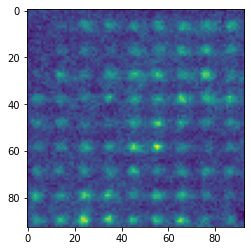

In [256]:
plt.imshow(sub_img.mean(0))

In [ ]:
fig,axes = plt.subplots(nrows=4,ncols=4,dpi=100)

ica_img = empty()
for i in range(4):
    for j in range(4):
        axes[i,j].imshow((crop_img.mean(0)/crop_bg.mean(0))[i*93:(i+1)*93,j*93:(j+1)*93],cmap='Reds',vmin=0.16)